# Lab2 Example:

In [28]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
%matplotlib inline

In [29]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'cpu.csv')
cpu = pd.read_csv(data_path, delimiter = ',')

In [30]:
cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vendor  209 non-null    object 
 1   MYCT    209 non-null    float64
 2   MMIN    209 non-null    float64
 3   MMAX    209 non-null    float64
 4   CACH    209 non-null    float64
 5   CHMIN   209 non-null    float64
 6   CHMAX   209 non-null    float64
 7   ERP     209 non-null    float64
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [31]:
# Convert categorical variable into dummy variables 
vendor_1hot = pd.get_dummies(cpu['vendor'])
X = pd.concat([cpu.drop(['ERP', 'vendor'], axis=1), vendor_1hot], axis=1)
y = cpu['ERP']

In [32]:
X.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,adviser,amdahl,apollo,basf,...,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,sratus,wang
0,125.0,256.0,6000.0,256.0,16.0,128.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,8000.0,32000.0,32.0,8.0,32.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,8000.0,32000.0,32.0,8.0,32.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29.0,8000.0,16000.0,32.0,8.0,16.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
def r_2(X, y, seed=0, normalize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=seed)
    lm = LinearRegression(normalize=normalize).fit(X_train,y_train)
    r2_train=lm.score(X_train,y_train)
    r2_test=lm.score(X_test,y_test)
    return r2_train, r2_test
count=0
for seed in range(100):
    print(r_2(X, y, seed))
    if r_2(X, y, seed)[1] < 0:
        count += 1
print(count)

(0.9405321937401255, 0.7791673058692556)
(0.9377041536426675, 0.6971227991824193)
(0.9348617205844371, 0.8357447136327728)
(0.934471570676046, 0.8516286092137728)
(0.9337447143740536, 0.8805622615208168)
(0.9249667452040793, 0.9181329013302841)
(0.9371115591378524, 0.5808687073527051)
(0.941071375603818, 0.8481292106779257)
(0.9328482148372864, 0.8557706913851613)
(0.9406488187479326, 0.8573395438718866)
(0.9355402857799388, 0.788046274772983)
(0.932092307680171, 0.8237393023335212)
(0.9314667401977148, 0.888598894051575)
(0.9405429270243281, 0.6891629274209157)
(0.9422429213142977, 0.5674791350046854)
(0.938924477597376, 0.8655508178547977)
(0.9420799506361437, 0.48544036868486906)
(0.9367277446641764, 0.5518192188266566)
(0.9586913261660241, 0.7521235925254782)
(0.9356588185012017, 0.8390129804396176)
(0.9338649278925151, 0.8104211856416345)
(0.9298710932133626, 0.8952804460331626)
(0.9334590555430398, 0.8918580139543754)
(0.9399538970115516, 0.3809353998247964)
(0.9419714155013733, 

In [23]:
count1=0
for seed in range(100):
    print(r_2(X, y, seed, normalize=True))
    if r_2(X, y, seed, normalize=True)[1] < 0:
        count1 += 1
print(count1)

(0.9405220642547427, 0.7795167917489937)
(0.9377063893276886, 0.6958810386485302)
(0.934856612416683, -2.372504701185424e+24)
(0.9344744134672445, -5.014803388751078e+22)
(0.9337458790579369, -2.5685966823037825e+23)
(0.9249556773242946, 0.918340347608524)
(0.9371021445816965, -2.5865372784010575e+25)
(0.9410710585260168, -1.0938047748425248e+20)
(0.9328414921555706, -6.8178170666532e+25)
(0.9406475050039133, 0.8573328308526996)
(0.935535491540301, 0.7876842575396057)
(0.9320577869385861, -1.1191655216982214e+24)
(0.9314524682153946, -1.0179026268880941e+24)
(0.9405419210489835, 0.6891720059251224)
(0.9422438258991687, -2.2130355117133333e+22)
(0.9389200235173968, -2.729308599232083e+22)
(0.9420763641916023, -1.5921969827955743e+24)
(0.9367299841489135, -3.315147947161032e+24)
(0.9586913614334346, -1.3514873926348251e+20)
(0.9356594644717918, -1.073453796354831e+23)
(0.933861130296913, -1.743207729877728e+24)
(0.9298789204529698, 0.8951504620120497)
(0.9334555546618017, 0.8916129332065

In [50]:
def learning_curves(X, y, normalize=True):
    fig, axes = plt.subplots(10, figsize=(8,80))
    for seed in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        train_errors, test_errors = [], []
        lr = LinearRegression(normalize=normalize)
        for m in range(1, len(X_train)):
            lr.fit(X_train[:m], y_train[:m])
            train_errors.append(lr.score(X_train[:m], y_train[:m]))
            test_errors.append(lr.score(X_test, y_test))
        axes[seed].plot(train_errors, 'r-+', label='train')
        axes[seed].plot(test_errors, 'b-', label='test')
        axes[seed].legend(loc='lower right', fontsize=12)   
        axes[seed].set_xlabel('Training set size', fontsize=14) 
        axes[seed].set_ylim(0, 1)
        axes[seed].set_ylabel('R2_score', fontsize=14)    
        axes[seed].set_title('seed='+str(seed))   
        plt.show()      
    return None

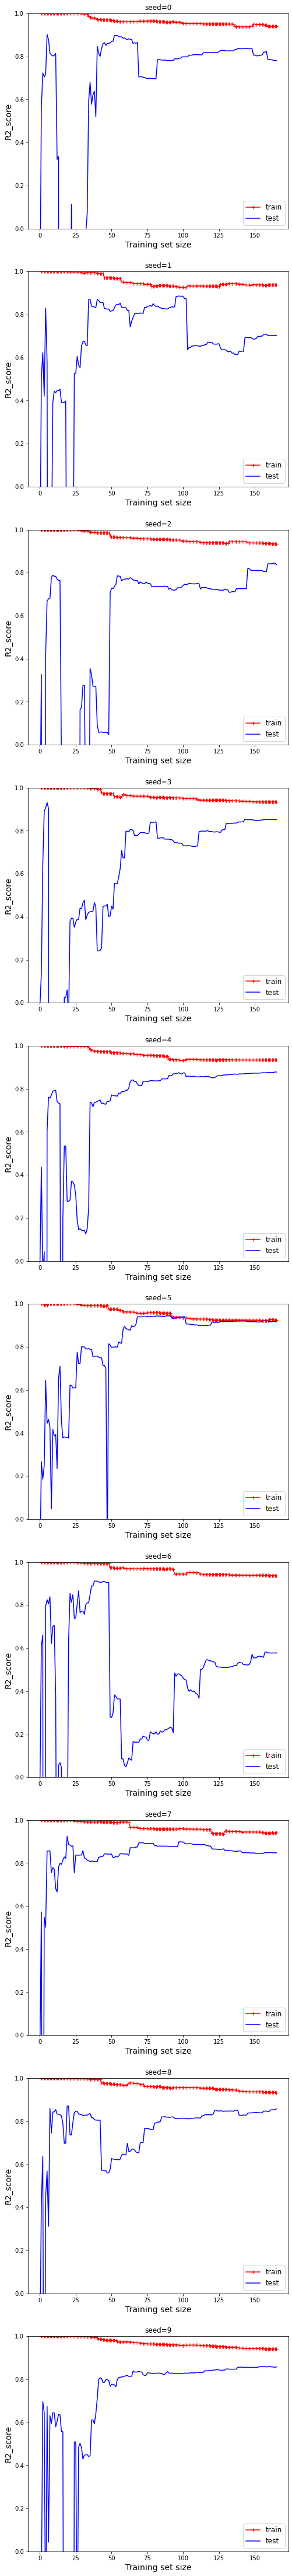

In [52]:
learning_curves(X, y, normalize=False)                  
plt.show()

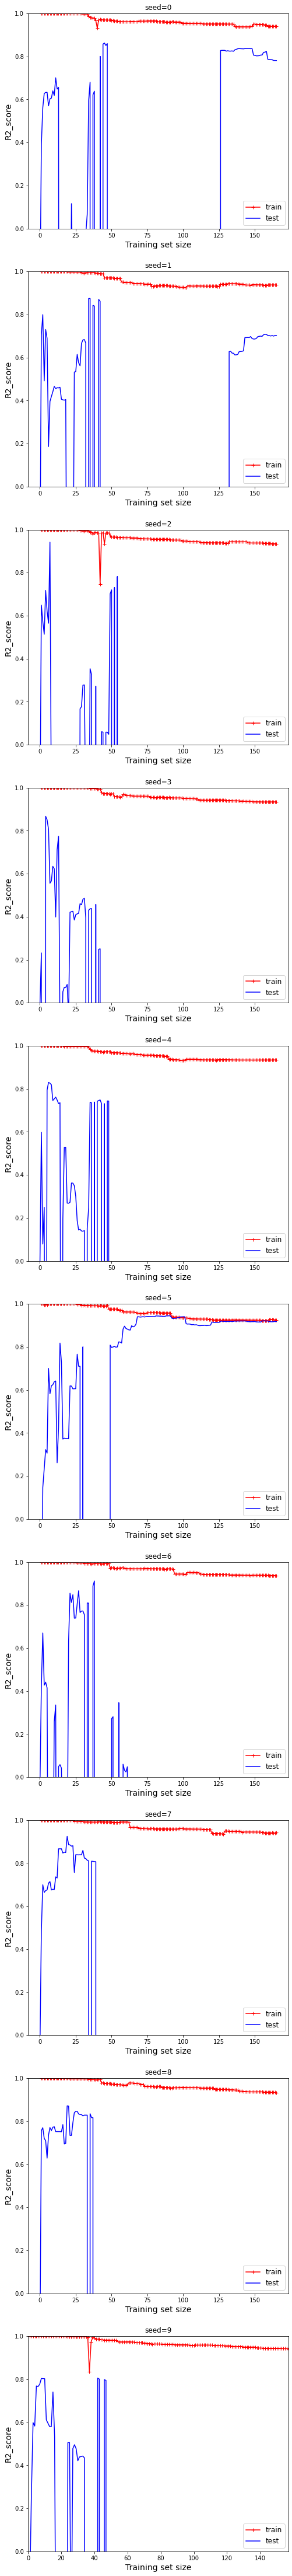

In [51]:
learning_curves(X, y, normalize=True)                  
plt.show()

# Coursework1 Example: